"""
This is the early on interactive exploration and modeling notebook file.
We added the file here for reference only and to show our work, and serve as
a data lineage and experiemnts log; the insightful parts of the work are later
turned into more rigorous python functions in various directories in this project.
"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import random
import numpy as np

seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
print(f"Random seed set as {seed}")

torch.cuda.empty_cache()

Random seed set as 42


In [ ]:
MAIN_DIR = "drive/MyDrive"
# MAIN_DIR = "drive/MyDrive/metamia"

In [ ]:
# !pip install transformers
!pip install transformers[torch]

In [ ]:
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import json
import pandas as pd

In [ ]:
df = pd.read_csv(f"{MAIN_DIR}/cleaned_data.csv.gz")
df.head()

,Unnamed: 0,id,country,description,designation,points,price,province,region_1,region_2,...,variety_cleaned,winery_cleaned,wine_year,price_imputated,wine_year_imputated,total_reviews_by_taster_on_title,total_unique_score_by_taster_on_title,description_cleaned_tokenized,description_lemmatized_eng,description_processed_text
0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,...,white blend,nicosia,2013.0,NaN,2013.0,1,1,"['aromas', 'include', 'tropical', 'fruit', 'br...","['aroma', 'include', 'tropical', 'fruit', 'bro...",aroma include tropical fruit broom brimstone d...
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,...,portuguese red,quinta dos avidagos,2011.0,15.0,2011.0,1,1,"['ripe', 'fruity', 'wine', 'smooth', 'still', ...","['ripe', 'fruity', 'wine', 'smooth', 'still', ...",ripe fruity wine smooth still structured firm ...
2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,...,pinot gris,rainstorm,2013.0,14.0,2013.0,1,1,"['tart', 'snappy', 'flavors', 'lime', 'flesh',...","['tart', 'snappy', 'flavor', 'lime', 'flesh', ...",tart snappy flavor lime flesh rind dominate gr...
3,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,...,riesling,st julian,2013.0,13.0,2013.0,1,1,"['pineapple', 'rind', 'lemon', 'pith', 'orange...","['pineapple', 'rind', 'lemon', 'pith', 'orange...",pineapple rind lemon pith orange blossom start...
4,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,...,pinot noir,sweet cheeks,2012.0,65.0,2012.0,1,1,"['much', 'like', 'regular', 'bottling', '2012'...","['much', 'like', 'regular', 'bottling', 'come'...",much like regular bottling come across rather ...


# New Section

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery',
       'region_2_leveled', 'province_leveled', 'region_1_leveled',
       'price_currency', 'country_cleaned', 'description_cleaned',
       'designation_cleaned', 'province_leveled_cleaned',
       'region_1_leveled_cleaned', 'region_2_leveled_cleaned',
       'taster_name_cleaned', 'taster_twitter_handle_cleaned', 'title_cleaned',
       'variety_cleaned', 'winery_cleaned', 'wine_year', 'price_imputated',
       'wine_year_imputated', 'total_reviews_by_taster_on_title',
       'total_unique_score_by_taster_on_title',
       'description_cleaned_tokenized', 'description_lemmatized_eng',
       'description_processed_text'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                                 int64
id                                         int64
country                                   object
description                               object
designation                               object
points                                     int64
price                                    float64
province                                  object
region_1                                  object
region_2                                  object
taster_name                               object
taster_twitter_handle                     object
title                                     object
variety                                   object
winery                                    object
region_2_leveled                          object
province_leveled                          object
region_1_leveled                          object
price_currency                            object
country_cleaned                           object
description_cleaned 

In [ ]:
# train_texts, train_labels = df['document'].values, df['label'].values

In [ ]:
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment

specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
df.points.describe()

count    119991.000000
mean         88.442191
std           3.092890
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

reviews = df.description_cleaned_tokenized
tuned_target = np.where(df.points.values > 92, 'pos', np.where(df.points.values < 85, 'neg', 'neu'))

X, y = reviews, tuned_target

# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from transformers import TrainingArguments, Trainer

repo_name = "finetuning-sentiment-model-3000-samples"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=specific_model,
   args=training_args,
   train_dataset=X_train,
   eval_dataset=X_test,
  #  tokenizer=tokenizer,
  #  data_collator=data_collator,
  #  compute_metrics=compute_metrics,
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TfidVectorizer object. Remove all the uninformative words such as 'and,' 'the,' and 'him' from analysis. Bigrams only (ngram_range=(2,2)).
tfidf=TfidfVectorizer(stop_words="english", ngram_range=(2,2))

# Count the words in each description, calculate idf, and multiply idf by tf.
tfidf_matrix=tfidf.fit_transform(variety_description_2["description"])

# Resulting matrix should be # of descriptions (row) x # of bigrams (column)
tfidf_matrix.shape


(120518, 784500)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
variety_description_2=variety_description_2.reset_index()
indices = pd.Series(variety_description_2.index, index=variety_description_2['variety'])

NameError: ignored

In [ ]:
def rec_from_grape(grape, cosine_sim=cosine_sim):
    # Get the index of the input wine
    idx = indices[grape]

    # Get the pairwise similarity scores between the input wine and all the wines
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the wines based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Select the top three similarity scores
    sim_scores = sim_scores[1:4]

    # Get the grape variety indices
    wine_idx_list = [i[0] for i in sim_scores]

    # Create the output dataframe
    df=pd.DataFrame(columns=["similar wines", "Top 6 common words in wine reviews"])

    for wine_idx in wine_idx_list:

        g_variety=variety_description_2.iloc[wine_idx]["variety"]

        # Get top 6 common words in the review
        des=variety_description_2.iloc[wine_idx]["description"]

        if g_variety in variety_multi_reviews:     # If the wine has more than one reviews
            des_split=des.split(", ")
            key_words_list=des_split[:6]
            key_words_str=", ".join(key_words_list)

        else:
            key_words_str = des

        new_row={"similar wines": g_variety, "Top 6 common words in wine reviews": key_words_str}
        df=df.append(new_row, ignore_index=True)

    df.set_index("similar wines")

    # Widen the column width so that all common words could be displayed
    pd.set_option('max_colwidth', 500)

    return df

NameError: ignored

In [ ]:
specific_model(df.description_cleaned_tokenized[0])[0]

{'label': 'NEU', 'score': 0.9644588828086853}

In [ ]:
# list(df.description_cleaned)

In [ ]:
specific_model(list(df.description_cleaned)[:20])

[{'label': 'NEU', 'score': 0.7791174650192261},
 {'label': 'POS', 'score': 0.9838100671768188},
 {'label': 'NEU', 'score': 0.8427485823631287},
 {'label': 'NEU', 'score': 0.7074217796325684},
 {'label': 'POS', 'score': 0.9449918866157532},
 {'label': 'NEU', 'score': 0.7023941278457642},
 {'label': 'NEU', 'score': 0.7243028879165649},
 {'label': 'POS', 'score': 0.7814382314682007},
 {'label': 'POS', 'score': 0.8158489465713501},
 {'label': 'POS', 'score': 0.9485050439834595},
 {'label': 'POS', 'score': 0.9342330098152161},
 {'label': 'POS', 'score': 0.6990194916725159},
 {'label': 'NEU', 'score': 0.632193386554718},
 {'label': 'NEU', 'score': 0.7378215789794922},
 {'label': 'NEU', 'score': 0.5097165703773499},
 {'label': 'POS', 'score': 0.905531644821167},
 {'label': 'NEU', 'score': 0.8528882265090942},
 {'label': 'POS', 'score': 0.9671221971511841},
 {'label': 'NEU', 'score': 0.9218495488166809},
 {'label': 'POS', 'score': 0.7081804275512695}]

In [ ]:
df_test_mini = df[:20]
df_test_mini['test'] = specific_model(list(df.description_cleaned)[:20])

# Define a function to limit the number of words in a list
def limit_words(word_list, max_words=128):
    return word_list[:max_words]

# Apply the function to the DataFrame column
df_test_mini['word_list_column'] = df_test_mini['description_cleaned'].apply(lambda x: limit_words(x, max_words=128))


<ipython-input-20-78cda3637f67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_mini['test'] = specific_model(list(df.description_cleaned)[:20])
<ipython-input-20-78cda3637f67>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_mini['word_list_column'] = df_test_mini['description_cleaned'].apply(lambda x: limit_words(x, max_words=128))


In [ ]:
# df_test_mini.head()

In [ ]:
# df_test_mini['sentiment_label'] = df_test_mini.test.label
# df_test_mini['sentiment_score'] = df_test_mini.test.score
df_test_mini.head()

,Unnamed: 0,id,country,description,designation,points,price,province,region_1,region_2,...,wine_year,price_imputated,wine_year_imputated,total_reviews_by_taster_on_title,total_unique_score_by_taster_on_title,description_cleaned_tokenized,description_lemmatized_eng,description_processed_text,test,word_list_column
0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,...,2013.0,NaN,2013.0,1,1,"['aromas', 'include', 'tropical', 'fruit', 'br...","['aroma', 'include', 'tropical', 'fruit', 'bro...",aroma include tropical fruit broom brimstone d...,"{'label': 'NEU', 'score': 0.7791174650192261}",aromas include tropical fruit broom brimston...
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,...,2011.0,15.0,2011.0,1,1,"['ripe', 'fruity', 'wine', 'smooth', 'still', ...","['ripe', 'fruity', 'wine', 'smooth', 'still', ...",ripe fruity wine smooth still structured firm ...,"{'label': 'POS', 'score': 0.9838100671768188}",this is ripe and fruity a wine that is smooth...
2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,...,2013.0,14.0,2013.0,1,1,"['tart', 'snappy', 'flavors', 'lime', 'flesh',...","['tart', 'snappy', 'flavor', 'lime', 'flesh', ...",tart snappy flavor lime flesh rind dominate gr...,"{'label': 'NEU', 'score': 0.8427485823631287}",tart and snappy the flavors of lime flesh and...
3,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,...,2013.0,13.0,2013.0,1,1,"['pineapple', 'rind', 'lemon', 'pith', 'orange...","['pineapple', 'rind', 'lemon', 'pith', 'orange...",pineapple rind lemon pith orange blossom start...,"{'label': 'NEU', 'score': 0.7074217796325684}",pineapple rind lemon pith and orange blossom ...
4,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,...,2012.0,65.0,2012.0,1,1,"['much', 'like', 'regular', 'bottling', '2012'...","['much', 'like', 'regular', 'bottling', 'come'...",much like regular bottling come across rather ...,"{'label': 'POS', 'score': 0.9449918866157532}",much like the regular bottling from 2012 this...


In [ ]:
df['description_cleaned_limit'] = df['description_cleaned'].apply(lambda x: limit_words(x, max_words=128))


In [ ]:
df['description_cleaned_limit'].head()

0    aromas include tropical fruit  broom  brimston...
1    this is ripe and fruity  a wine that is smooth...
2    tart and snappy  the flavors of lime flesh and...
3    pineapple rind  lemon pith and orange blossom ...
4    much like the regular bottling from 2012  this...
Name: description_cleaned_limit, dtype: object

In [ ]:
df['base_sentiment_label'] = specific_model(list(df.description_cleaned_limit))

In [ ]:
# df['base_sentiment_label'] = specific_model(df.description_cleaned_tokenized[0])

In [ ]:
df['base_sentiment_label'].head()

0    {'label': 'NEU', 'score': 0.8123481869697571}
1    {'label': 'POS', 'score': 0.7544678449630737}
2    {'label': 'NEU', 'score': 0.9003725647926331}
3    {'label': 'NEU', 'score': 0.6538661122322083}
4    {'label': 'NEU', 'score': 0.9240036606788635}
Name: base_sentiment_label, dtype: object

In [ ]:
df.to_csv('sentiment_data.csv')

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import files
files.download('sentiment_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
wine_df = df

wine_df.loc[:, 'wineId'] = wine_df.loc[:, 'title'].astype('category').cat.codes

wine_df.loc[:, ['description', 'wineId', 'title']].head()

train_wine, test_wine = train_test_split(wine_df, train_size=0.05)

train_wine.reset_index(drop=True, inplace=True)

print(f"Training on {len(train_wine)} samples.")


Training on 5999 samples.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 0, stop_words='english')

tfidf_matrix = tf.fit_transform(train_wine['description'])

print(f"The term-frequency inverse document frequency matrix is {tfidf_matrix.shape[0]} by {tfidf_matrix.shape[1]}")


The term-frequency inverse document frequency matrix is 5999 by 214552


In [ ]:
# First finding the cosine similarities for the tfidf matrix
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


# Next, appending the results to a dictionary of the similar items to each wine
results = {}
for idx, row in train_wine.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:100:-1]
    similar_items = [(cosine_similarities[idx][i], train_wine['wineId'][i]) for i in similar_indices]
    results[row['wineId']] = similar_items[1:]


In [ ]:
def item(id):
    return train_wine.loc[train_wine['wineId'] == id]['title'].tolist()[0].split(' - ')[0]

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id) + ' ...')
    print('-----')
    recs = results[item_id][:num]
    for rec in recs:
        print('Recommended: ' + item(rec[1]) + '(score: ' + f"{rec[0]:.2f}" + ')')

In [ ]:
# itemId (wineId) is grabbed from the trainset of wines

itemId_ = train_wine.loc[:, 'wineId'].values[0]
itemName_ = train_wine.loc[train_wine['wineId'] == itemId_, 'title'].values[0]

print(f"Using itemId {itemId_} which is {itemName_} \n")

# The recommend function is then run to find and return the top num matches (5 in this case)

recommend(item_id=itemId_, num=5)

Using itemId 82886 which is Pascal Bouchard 2007 Les Clos Grand Cru  (Chablis) 

Recommending 5 products similar to Pascal Bouchard 2007 Les Clos Grand Cru  (Chablis) ...
-----
Recommended: Tegernseerhof 2006 Steinertal Riesling (Wachau)(score: 0.11)
Recommended: Château la Varière 2009 Les Melleresses  (Bonnezeaux)(score: 0.09)
Recommended: Steininger 2007 Grand Grü Grüner Veltliner (Kamptal)(score: 0.09)
Recommended: Domaine Laroche 2009 Les Vaudevey  (Chablis)(score: 0.08)
Recommended: Domaine Pascal et Mireille Renaud 2015 Aux Insarts  (Pouilly-Fuissé)(score: 0.08)


In [ ]:


# We can then compare the descriptions of the two wines to see how they match

description_original = train_wine.loc[train_wine['title'] == itemName_, 'description'].values[0]

description_matched = train_wine.loc[train_wine['wineId'] == results[itemId_][0][1], 'description'].values[0]

print(f"First wine description: \n{description_original} \n\nMatched wine description: \n{description_matched}")



First wine description: 
A super-rich wine, packed with peach and green plum fruits, layers of wood and an intense concentration. An impressive wine that shows weight and richness as well as style. 

Matched wine description: 
The intensity of this wine is almost overwhelming, with its crisp minerality, apple skin and green plum flavors and white stone fruits. The concentration is impressive for a wine that looks likely to need at least five years before drinking.


In [ ]:


from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD



In [ ]:
data_recommend = df[['province','variety','points']]
data_recommend.dropna(axis=0, inplace=True)
data_recommend.drop_duplicates(['province','variety'], inplace=True)

data_pivot = data_recommend.pivot(index= 'variety',columns='province',values='points').fillna(0)
data_matrix = csr_matrix(data_pivot)

<ipython-input-35-27e6571b5c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_recommend.dropna(axis=0, inplace=True)
<ipython-input-35-27e6571b5c0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_recommend.drop_duplicates(['province','variety'], inplace=True)


In [ ]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(data_matrix)

In [ ]:
# sample 5
for n in range(5):
    query_index = np.random.choice(data_pivot.shape[0])
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(data_pivot.iloc[query_index].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recmmendation for ## {0} ##:'.format(data_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,data_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')


Recmmendation for ## Passerina ##:
1: Pecorino with distance: 0.0
2: Biancale with distance: 0.2807393884157299
3: Lambrusco with distance: 0.2807393884157299
4: Cococciola with distance: 0.2807393884157299
5: Lambrusco Salamino with distance: 0.2807393884157299


Recmmendation for ## Viognier-Roussanne ##:
1: Black Muscat with distance: 2.1694395547333656e-05
2: Souzao with distance: 0.00013665959507358494
3: Marsanne-Viognier with distance: 0.0001645509930547906
4: Sangiovese Cabernet with distance: 0.0002504140661689913
5: Counoise with distance: 0.0003783894271950361


Recmmendation for ## Cabernet Blend ##:
1: Tempranillo with distance: 0.45264964114399653
2: Cabernet Sauvignon-Merlot with distance: 0.4762030208450745
3: Bordeaux-style Red Blend with distance: 0.49207167123072737
4: Shiraz with distance: 0.5240812170783381
5: Tempranillo-Cabernet Sauvignon with distance: 0.5470170735853391


Recmmendation for ## Tinta Francisca ##:
1: Malvasia Fina with distance: 0.0
2: Gouveio wi

In [ ]:
#

from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

wine1 = df.copy()

# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']
wine1 = wine_df[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] >85]
wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)



In [ ]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [ ]:

# Predict

query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recmmendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))




Recmmendation for Sauvignon Blanc-Chenin Blanc:

1: Fumé Blanc with distance: 0.42217097225640654
2: Johannisberg Riesling with distance: 0.5878525297334786
3: Muscatel with distance: 0.5972195176940813
4: G-S-M with distance: 0.6178116194428439
5: Roussanne-Marsanne with distance: 0.7070261986355083


In [ ]:
# df['baseline_sentiment'] = None
# df['baseline_sentiment_label'] = None
# df['baseline_sentiment_score'] = None
# for i in range(len(df)):
#   try:
#     sent = specific_model(list(df.description_cleaned)[i])[0]
#     df['baseline_sentiment'][i] = sent
#     df['baseline_sentiment_label'][i] = sent.label
#     df['baseline_sentiment_score'][i] = sent.score
#   except Exception as e:
#     print('unable to run', e)
#     continue


In [ ]:
# rf

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
numeric_columns

,Unnamed: 0,id,points,price,wine_year,price_imputated,wine_year_imputated,total_reviews_by_taster_on_title,total_unique_score_by_taster_on_title
0,0,0,87,NaN,2013.0,NaN,2013.0,1,1
1,1,1,87,15.0,2011.0,15.0,2011.0,1,1
2,2,2,87,14.0,2013.0,14.0,2013.0,1,1
3,3,3,87,13.0,2013.0,13.0,2013.0,1,1
4,4,4,87,65.0,2012.0,65.0,2012.0,1,1
...,...,...,...,...,...,...,...,...,...
119986,119986,129966,90,28.0,2013.0,28.0,2013.0,1,1
119987,119987,129967,90,75.0,2004.0,75.0,2004.0,1,1
119988,119988,129968,90,30.0,2013.0,30.0,2013.0,1,1
119989,119989,129969,90,32.0,2012.0,32.0,2012.0,1,1


In [ ]:
# Specify columns to exclude
columns_to_exclude = ['points'] #, 'id']

# Use loc to select all columns except the specified ones
# selected_columns = df.loc[:, ~df.columns.isin(columns_to_exclude)]
numeric_columns = df.select_dtypes(exclude=['object'])
selected_columns = numeric_columns.loc[:, ~numeric_columns.columns.isin(columns_to_exclude)]

X_train, X_test, y_train, y_test = train_test_split(selected_columns, df.sentiment_label, test_size=0.2, random_state=42)



# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train.fillna(0), y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test.fillna(0))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.2830117921580066
Confusion Matrix:
 [[  6   5   4   9  10  10   9  15   4   5   2   2   0   1   0   0   0   0
    0   0   0]
 [  5  13  11   5  12  17  14  22  17   7   3   7   2   1   0   0   0   0
    0   0   0]
 [  6   5  49  30  30  37  33  50  35  22  20  15  12   6   2   2   0   0
    0   0   0]
 [  2   2  21 121  67  53  76  85  55  31  35  21   8   5   2   1   0   0
    0   0   0]
 [  6   8  15  48 340 150 143 181 121  65  73  41  29  10   3   3   2   0
    0   0   0]
 [  4   6  24  35 128 545 176 267 214 103 120  69  47  29   5   2   1   1
    0   0   0]
 [  1  10  21  49 131 198 665 342 310 178 187 136  72  32  13   4   0   1
    1   0   0]
 [  3   5  34  45 117 215 294 993 403 241 339 182 141  53  24   5   1   0
    0   0   0]
 [  5   3  19  29 116 188 277 431 959 259 315 216 163  87  37   9   0   0
    0   0   0]
 [  1   3  18  25  43  95 171 252 296 471 307 194 142  81  31   6   2   0
    1   0   0]
 [  1   3  13  20  55 105 149 297 321 250 852 301 183 121  64 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
len(df), len(list(df.description_cleaned))

(119991, 119991)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy
import numpy as np
from scipy.special import softmax
import tensorflow as tf

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


#distilbert

model_name_d="distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(model_name_d)

config = AutoConfig.from_pretrained(model_name_d)

model = AutoModelForSequenceClassification.from_pretrained(model_name_d)

#bert

from transformers import BertTokenizer, BertForSequenceClassification,BertConfig

model_name_b='bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(model_name_b)

config = BertConfig.from_pretrained(model_name_b)

model = BertForSequenceClassification.from_pretrained(model_name_b)

def sentiment_labels(text):
    encoded_input = tokenizer(text, padding=True,truncation=True,max_length=512, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    return config.id2label[ranking[0]]

text=" Very Good Service offered by Team."
sentiment_labels(text)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'LABEL_0'

In [ ]:
# fine tuned sentiments

In [ ]:
df = pd.read_csv(f"{MAIN_DIR}/sentiment_data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,country,description,designation,points,price,province,region_1,...,wine_year,price_imputated,wine_year_imputated,total_reviews_by_taster_on_title,total_unique_score_by_taster_on_title,description_cleaned_tokenized,description_lemmatized_eng,description_processed_text,description_cleaned_limit,base_sentiment_label
0,0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,...,2013.0,NaN,2013.0,1,1,"['aromas', 'include', 'tropical', 'fruit', 'br...","['aroma', 'include', 'tropical', 'fruit', 'bro...",aroma include tropical fruit broom brimstone d...,aromas include tropical fruit broom brimston...,"{'label': 'NEU', 'score': 0.8123481869697571}"
1,1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,...,2011.0,15.0,2011.0,1,1,"['ripe', 'fruity', 'wine', 'smooth', 'still', ...","['ripe', 'fruity', 'wine', 'smooth', 'still', ...",ripe fruity wine smooth still structured firm ...,this is ripe and fruity a wine that is smooth...,"{'label': 'POS', 'score': 0.7544678449630737}"
2,2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,...,2013.0,14.0,2013.0,1,1,"['tart', 'snappy', 'flavors', 'lime', 'flesh',...","['tart', 'snappy', 'flavor', 'lime', 'flesh', ...",tart snappy flavor lime flesh rind dominate gr...,tart and snappy the flavors of lime flesh and...,"{'label': 'NEU', 'score': 0.9003725647926331}"
3,3,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,...,2013.0,13.0,2013.0,1,1,"['pineapple', 'rind', 'lemon', 'pith', 'orange...","['pineapple', 'rind', 'lemon', 'pith', 'orange...",pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith and orange blossom ...,"{'label': 'NEU', 'score': 0.6538661122322083}"
4,4,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,...,2012.0,65.0,2012.0,1,1,"['much', 'like', 'regular', 'bottling', '2012'...","['much', 'like', 'regular', 'bottling', 'come'...",much like regular bottling come across rather ...,much like the regular bottling from 2012 this...,"{'label': 'NEU', 'score': 0.9240036606788635}"


In [ ]:
import ast

In [ ]:
df['base_sentiment_label_dict'] = df['base_sentiment_label'].apply(lambda x: ast.literal_eval(x.strip()))

In [ ]:
df['base_sentiment_label_dict'].head()

0    {'label': 'NEU', 'score': 0.8123481869697571}
1    {'label': 'POS', 'score': 0.7544678449630737}
2    {'label': 'NEU', 'score': 0.9003725647926331}
3    {'label': 'NEU', 'score': 0.6538661122322083}
4    {'label': 'NEU', 'score': 0.9240036606788635}
Name: base_sentiment_label_dict, dtype: object

In [ ]:
df[['sentiment', 'sentiment_score']] = df['base_sentiment_label_dict'].apply(lambda x: pd.Series([x['label'], x['score']]))


sentiment
NEG     1697
NEU    60197
POS    58097
dtype: int64


<Axes: >

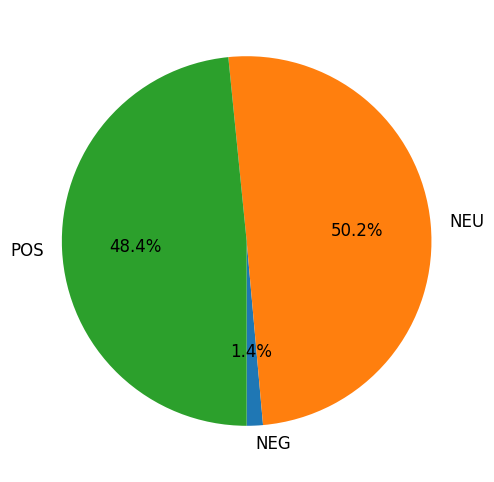

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


## Inference

In [ ]:
# Specify columns to exclude
columns_to_exclude = ['points'] #, 'id']

# Use loc to select all columns except the specified ones
# selected_columns = df.loc[:, ~df.columns.isin(columns_to_exclude)]
numeric_columns = df.select_dtypes(exclude=['object'])
selected_columns = numeric_columns.loc[:, ~numeric_columns.columns.isin(columns_to_exclude)]

X_train, X_test, y_train, y_test = train_test_split(selected_columns, df.sentiment, test_size=0.2, random_state=42)



# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train.fillna(0), y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test.fillna(0))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5858994124755198
Confusion Matrix:
 [[   3  212  131]
 [  10 8050 3961]
 [   7 5617 6008]]
Classification Report:
               precision    recall  f1-score   support

         NEG       0.15      0.01      0.02       346
         NEU       0.58      0.67      0.62     12021
         POS       0.59      0.52      0.55     11632

    accuracy                           0.59     23999
   macro avg       0.44      0.40      0.40     23999
weighted avg       0.58      0.59      0.58     23999



In [ ]:


# Create a single DataFrame that contains variety and description only. Delete any rows that are duplicated or contain missing data.
variety_description= df[["variety", "description"]]
variety_description=variety_description.drop_duplicates().dropna()
variety_description.head()



,variety,description
0,White Blend,"Aromas include tropical fruit, broom, brimston..."
1,Portuguese Red,"This is ripe and fruity, a wine that is smooth..."
2,Pinot Gris,"Tart and snappy, the flavors of lime flesh and..."
3,Riesling,"Pineapple rind, lemon pith and orange blossom ..."
4,Pinot Noir,"Much like the regular bottling from 2012, this..."


In [ ]:
len(variety_description["variety"].unique().tolist())

<Axes: >

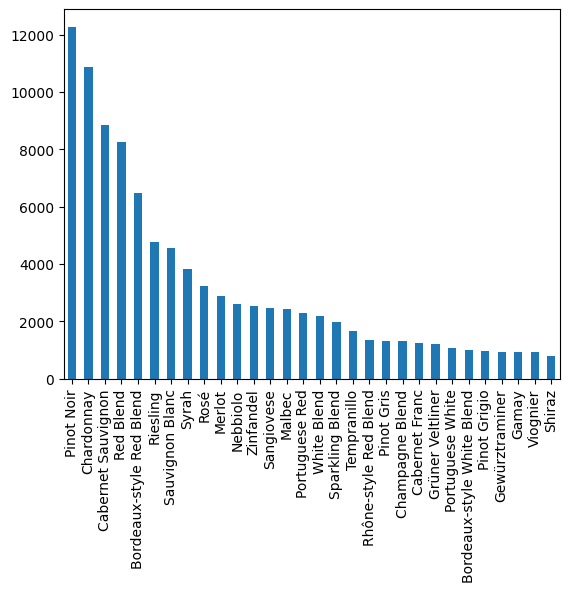

In [ ]:
# Create and display the chart showing the number of reviews per grape variety for the top 30 wines
variety_description["variety"].value_counts().iloc[:30].plot.bar()

In [ ]:
# Count the number of reviews per grape variety. This returns a series.
variety_rev_number=variety_description["variety"].value_counts()

# Convert the Series to Dataframe
df_rev_number=pd.DataFrame({'variety':variety_rev_number.index, 'rev_number':variety_rev_number.values})
df_rev_number[(df_rev_number["rev_number"]>1)].shape

# Create a ist of grape varieties that have more than one review
variety_multi_reviews=df_rev_number[(df_rev_number["rev_number"]>1)]["variety"].tolist()

# Create a ist of grape varieties that have only one review
variety_one_review=df_rev_number[(df_rev_number["rev_number"]==1)]["variety"].tolist()


In [ ]:
# Set index once
# variety_description_2 = variety_description.set_index("variety")
# variety_description = variety_description.set_index("variety")

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer



# Define a CountVectorizer object
    # stop_words="english": Remove all the uninformative words such as 'and', 'the' from analysis
    # ngram=range(1,2): means unigrams and bigrams
cv=CountVectorizer(stop_words="english", ngram_range=(2,2))

# Define a TfidfTransformer object
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)

for grape in variety_multi_reviews:

    df=variety_description.loc[[grape]]

    # Generate word counts for the words used in the reviews of a specific grape variety
    word_count_vector=cv.fit_transform(df["description"])

    # Compute the IDF values
    tfidf_transformer.fit(word_count_vector)

    # Obtain top 100 common words (meaning low IDF values) used in the reviews. Put the IDF values in a DataFrame
    df_idf=pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(), columns=["idf_weights"])
    df_idf.sort_values(by=["idf_weights"], inplace=True)

    # Collect top 100 common words in a list
    common_words=df_idf.iloc[:100].index.tolist()

    # Convert the list to a string and create a dataframe
    common_words_str=", ".join(elem for elem in common_words)
    new_row= {"variety":grape, "description":common_words_str}

    # Add the variety and its common review words to a new dataframe
    variety_description_2=variety_description_2.append(new_row, ignore_index=True)


<ipython-input-38-bd2ec022e18e>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variety_description_2=variety_description_2.append(new_row, ignore_index=True)
<ipython-input-38-bd2ec022e18e>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variety_description_2=variety_description_2.append(new_row, ignore_index=True)
<ipython-input-38-bd2ec022e18e>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variety_description_2=variety_description_2.append(new_row, ignore_index=True)
<ipython-input-38-bd2ec022e18e>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variety_description_2=variety_description_2.append(new_row, ignore_index=True)


In [ ]:
from transformers import pipeline
classifier = pipeline(
                      task="zero-shot-classification",
#                       device=0,
                      model="facebook/bart-large-mnli"
                    )
text = 'I do not like this recommendation'
classifier(text,["positive","negative",'neutral'],multi_class=True)

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'I do not like this recommendation',
 'labels': ['negative', 'neutral', 'positive'],
 'scores': [0.9993223547935486, 0.000977799529209733, 0.0007853663992136717]}